In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf

In [ ]:
#None=16k, D = 20k, DP=25K
#Dummy Col = No. of Category -1

#D       DP      
1        0       
0        1       
0        0    
#y_pred=b0+b1*D(X1)+b2*DP(X2)
#b0=16, b1=4, b2=9

In [ ]:
np.std([5.85,6.75,6.23],ddof=1)

0.45181116999619814

In [2]:
A=pd.read_csv('car_sales.csv',index_col=0)
A.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [5]:
A['AirBags'].value_counts()

Driver only           43
None                  34
Driver & Passenger    16
Name: AirBags, dtype: int64

In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [ ]:
A.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.376642,0.413485,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.247260,0.315315,0.605142
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.384347,-0.494894,-0.843139
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264
Fuel.tank.capacity,0.635369,0.619480,0.581294,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.509689,0.613437,0.894018


In [ ]:
A['Make'].value_counts()

Cadillac Seville      1
Ford Tempo            1
Suzuki Swift          1
Ford Taurus           1
BMW 535i              1
                     ..
Chevrolet Lumina      1
Chevrolet Cavalier    1
Chevrolet Corsica     1
Toyota Tercel         1
Nissan Altima         1
Name: Make, Length: 93, dtype: int64

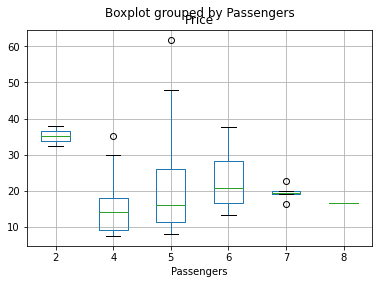

In [ ]:
A.boxplot(column='Price',by='Passengers')

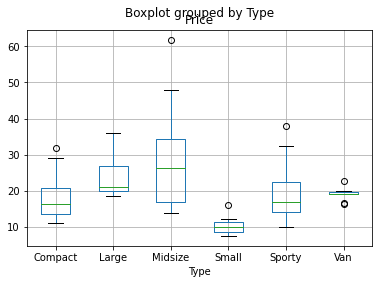

In [ ]:
B.boxplot(column='Price',by='Type')

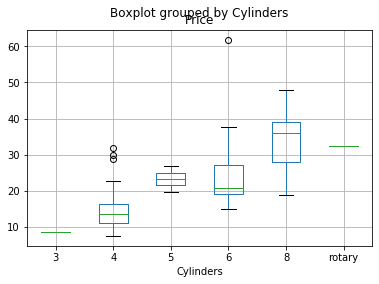

In [ ]:
A.boxplot(column='Price',by='Cylinders')

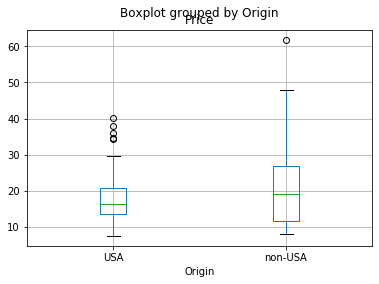

In [ ]:
A.boxplot(column='Price',by='Origin')

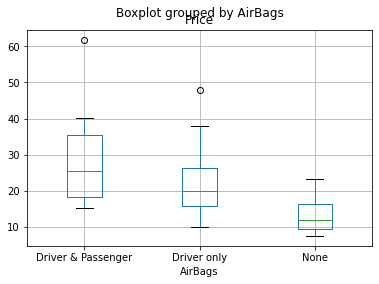

In [6]:
A.boxplot(column='Price',by='AirBags')

In [ ]:
A['Man.trans.avail'].value_counts()

Yes    61
No     32
Name: Man.trans.avail, dtype: int64

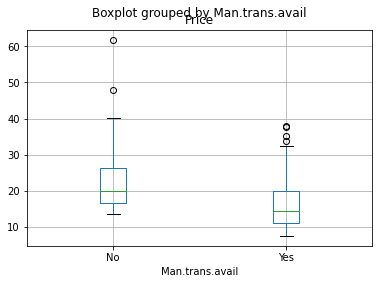

In [ ]:
A.boxplot(column='Price',by='Man.trans.avail')

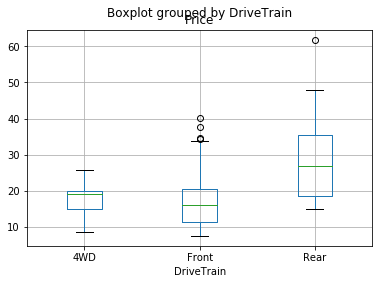

In [ ]:
A.boxplot(column='Price',by='DriveTrain')

In [ ]:
A.boxplot(column='Price',by='Man.trans.avail')

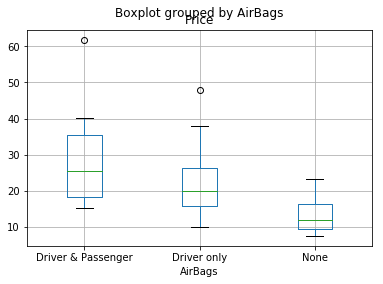

In [ ]:
A.boxplot(column='Price',by='AirBags')

In [7]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [ ]:
#Bigdata (10K to 100K) = dropna
#Dataset size (500-2000)upto 5-10% of size of n = Median Imputation or random sampling
#Dataset around 1000, 10-20% of record is missing = KNN Imputer (preserve your distribution)

In [12]:
A['Rear.seat.room'].fillna(A['Rear.seat.room'].median(),inplace=True)
A['Luggage.room'].fillna(A['Luggage.room'].median(),inplace=True)

In [9]:
test=pd.DataFrame({'x1':[3,8,np.nan,5,10],'x2':[5,2,7,8,9],'x3':[np.nan,9,8,2,5]})
test

,x1,x2,x3
0,3.0,5,NaN
1,8.0,2,9.0
2,NaN,7,8.0
3,5.0,8,2.0
4,10.0,9,5.0


In [10]:
from sklearn.impute import KNNImputer
#by default it is recursive

In [11]:
Imp=KNNImputer(n_neighbors=2)
Imp.fit_transform(test)

array([[ 3. ,  5. ,  5. ],
       [ 8. ,  2. ,  9. ],
       [ 6.5,  7. ,  8. ],
       [ 5. ,  8. ,  2. ],
       [10. ,  9. ,  5. ]])

In [ ]:
#using KNN imputer (n_neigh=2)
#test-1=8
#test-3=5
#test-4=11

In [ ]:
#Create a B data frame by dropping unwanted columns based on business context
B=A.drop(['Manufacturer','Model','Min.Price','Max.Price','Make'],axis=1)
B.head()

,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
1,Small,15.9,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
2,Midsize,33.9,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
3,Compact,29.1,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
4,Midsize,37.7,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
5,Midsize,30.0,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


In [ ]:
#Create dummy columns to categorical columns
B_Type=pd.get_dummies(B['Type'])
B_airbags=pd.get_dummies(B['AirBags'])
B_DT=pd.get_dummies(B['DriveTrain'])
B_cyl=pd.get_dummies(B['Cylinders'])
B_pas=pd.get_dummies(B['Passengers'])
B_update=pd.concat([B,B_Type,B_airbags,B_DT,B_cyl,B_pas],axis=1)
B_update.head()

,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Compact,Large,Midsize,Small,Sporty,Van,Driver & Passenger,Driver only,None,4WD,Front,Rear,3,4,5,6,8,rotary,2,4,5,6,7,8
1,Small,15.9,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
2,Midsize,33.9,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,Compact,29.1,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,Midsize,37.7,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
5,Midsize,30.0,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
B_update['Origin']=B_update['Origin'].replace({'USA': 0, 'non-USA': 1})
B_update['Man.trans.avail']=B_update['Man.trans.avail'].replace({'Yes': 0, 'No': 1})

In [ ]:
df=B_update.drop(['Type','AirBags','DriveTrain','Cylinders','Passengers'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               93 non-null     float64
 1   MPG.city            93 non-null     int64  
 2   MPG.highway         93 non-null     int64  
 3   EngineSize          93 non-null     float64
 4   Horsepower          93 non-null     int64  
 5   RPM                 93 non-null     int64  
 6   Rev.per.mile        93 non-null     int64  
 7   Man.trans.avail     93 non-null     int64  
 8   Fuel.tank.capacity  93 non-null     float64
 9   Length              93 non-null     int64  
 10  Wheelbase           93 non-null     int64  
 11  Width               93 non-null     int64  
 12  Turn.circle         93 non-null     int64  
 13  Rear.seat.room      93 non-null     float64
 14  Luggage.room        93 non-null     float64
 15  Weight              93 non-null     int64  
 16  Origin    

In [ ]:
df.corr()

,Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Compact,Large,Midsize,Small,Sporty,Van,Driver & Passenger,Driver only,None,4WD,Front,Rear,3,4,5,6,8,rotary,2,4,5,6,7,8
Price,1.000000,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.326504,0.619480,0.503628,0.500864,0.456028,0.392590,0.297898,0.355827,0.647179,0.100702,-0.061547,0.182621,0.446630,-0.525202,-0.005119,-0.013958,0.420338,0.165405,-0.500651,-0.067911,-0.329809,0.447917,-0.209857,-0.533908,0.056945,0.358506,0.423939,0.140969,0.242887,-0.243124,0.003389,0.182511,-0.003103,-0.031575
MPG.city,-0.594562,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.444210,-0.813144,-0.666239,-0.667108,-0.720534,-0.666389,-0.378071,-0.466621,-0.843139,0.260024,0.026253,-0.262233,-0.280852,0.723837,-0.043673,-0.314214,-0.228601,-0.122390,0.305857,-0.115852,0.332226,-0.299960,0.554229,0.470400,-0.102526,-0.499222,-0.273869,-0.100081,-0.142311,0.430677,0.069785,-0.270634,-0.280774,-0.137385
MPG.highway,-0.560680,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.404419,-0.786039,-0.542897,-0.615384,-0.640359,-0.593683,-0.362379,-0.333507,-0.810658,0.183109,0.067820,-0.162911,-0.247596,0.650782,-0.023839,-0.444243,-0.168569,-0.116715,0.252936,-0.215085,0.348962,-0.238411,0.490515,0.470227,-0.128207,-0.501822,-0.219827,-0.080332,-0.114229,0.413671,0.083612,-0.182445,-0.402706,-0.178632
EngineSize,0.597425,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.634686,0.759306,0.780283,0.732484,0.867110,0.778464,0.471733,0.620915,0.845075,-0.399321,-0.148664,0.547151,0.211136,-0.561383,-0.071354,0.168858,0.271051,0.154409,-0.372273,-0.032882,-0.346901,0.439490,-0.265619,-0.662090,-0.031286,0.504052,0.601449,-0.138206,0.119583,-0.325077,-0.215728,0.455837,0.117377,0.164935
Horsepower,0.788218,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.353033,0.711790,0.550865,0.486854,0.644413,0.561216,0.230654,0.331115,0.738798,-0.073216,-0.112254,0.250491,0.312701,-0.547691,0.131845,0.035292,0.352081,0.141756,-0.422675,-0.005517,-0.336896,0.405132,-0.272774,-0.615009,-0.015163,0.431017,0.497768,0.222500,0.380420,-0.214356,-0.061509,0.145297,0.021626,0.042374
RPM,-0.004955,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.430192,-0.333345,-0.441249,-0.467812,-0.539721,-0.505651,-0.335709,-0.484468,-0.427931,0.504674,0.062868,-0.375148,0.052258,0.320924,0.079590,-0.295718,0.034066,-0.116923,0.094350,-0.093950,0.254192,-0.225147,0.149508,0.292047,0.017324,-0.307455,-0.196708,0.214193,0.117237,0.174059,0.309930,-0.401319,-0.229060,-0.224959
Rev.per.mile,-0.426395,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.599297,-0.609710,-0.690233,-0.636824,-0.780460,-0.733160,-0.368190,-0.559548,-0.735264,0.446418,0.132388,-0.523165,-0.124941,0.530598,-0.015275,-0.149862,-0.175688,-0.202410,0.347233,0.023403,0.280786,-0.353092,0.368896,0.552205,0.084146,-0.526025,-0.397842,-0.001521,-0.133502,0.327497,0.171022,-0.411402,-0.115910,-0.114470
Man.trans.avail,0.326504,-0.444210,-0.404419,0.634686,0.353033,-0.430192,-0.599297,1.000000,0.483223,0.645906,0.653101,0.626017,0.616887,0.459300,0.567016,0.612110,-0.429538,-0.210219,0.505684,0.289208,-0.391159,-0.304902,0.222261,0.149604,0.054671,-0.173841,-0.032211,-0.053145,0.089633,-0.132236,-0.492331,-0.107375,0.448129,0.308112,-0.075512,-0.107375,-0.415169,-0.187253,0.561808,0.181406,0.143945
Fuel.tank.capacity,0.619480,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,0.483223,1.000000,0.690461,0.757674,0.798719,0.671343,0.501265,0.534164,0.894018,-0.122721,-0.083262,0.272463,0.304716,-0.669837,-0.092219,0.429512,0.202365,0.132412,-0.295672,0.185752,-0.398303,0.321158,-0.365585,-0.566271,0.160694,0.476242,0.335488,0.106616,0.151604,-0.383450,-0.168954,0.253990,0.331362,0.330365
Length,0.503628,-0.666239,-0.542897,0.780283,0.550865,-0.441249,-0.690233,0.645906,0.690461,1.0000

In [ ]:
X=df.drop('Price',axis=1)
Y=df['Price']

In [ ]:
X.shape,Y.shape

((93, 40), (93,))

In [ ]:
import statsmodels.api as sm
from statsmodels.api import add_constant

In [ ]:
Xc=sm.add_constant(X)

In [ ]:
model = sm.OLS(Y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     10.06
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           2.77e-14
Time:                        10:20:23   Log-Likelihood:                -252.59
No. Observations:                  93   AIC:                             575.2
Df Residuals:                      58   BIC:                             663.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 48.9084     16.859      2.901      0.005      15.161      82.656
MPG.city              -0.3244      0.432     -0.750      0.456      -1.190       0.541
MPG.highway            0.1691      0.398      0.425      0.672      -0.627       0.965
EngineSize            -1.6774      2.828     -0.593      0.555      -7.337       3.983
Horsepower             0.1388      0.045      3.088      0.003       0.049       0.229
RPM                   -0.0026      0.002     -1.169      0.247      -0.007       0.002
Rev.per.mile           0.0017      0.002      0.771      0.444      -0.003       0.006
Man.trans.avail        1.9656      2.167      0.907      0.368      -2.372       6.303
Fuel.tank.capacity     0.4672      0.540      0.865      0.391      -0.614       1.549
Length                 0.0485      0.110      0.443      0.660      -0.171       0.268
Wheelbase              0.3850      0.274      1.407      0.165      -0.163       0.933
Width                 -1.9087      0.544     -3.511      0.001      -2.997      -0.820
Turn.circle           -0.6224      0.365     -1.703      0.094      -1.354       0.109
Rear.seat.room         0.3343      0.359      0.932      0.355      -0.384       1.053
Luggage.room           0.2737      0.339      0.808      0.423      -0.405       0.952
Weight                -0.0013      0.006     -0.237      0.813      -0.013       0.010
Origin                 0.8789      1.641      0.536      0.594      -2.406       4.164
Compact                4.3319      2.252      1.924      0.059      -0.176       8.840
Large                  5.8686      4.637      1.265      0.211      -3.414      15.151
Midsize                8.2641      3.026      2.731      0.008       2.208      14.320
Small                  5.5221      2.958      1.867      0.067      -0.399      11.443
Sporty                10.8378      3.189      3.399      0.001       4.455      17.221
Van                   14.0839      6.266      2.248      0.028       1.542      26.626
Driver & Passenger    20.3152      6.263      3.244      0.002       7.779      32.851
Driver only           16.5788      5.483      3.023      0.004       5.602      27.555
None                  12.0144      5.385      2.231      0.030       1.234      22.795
4WD                   13.1235      5.376      2.441      0.018       2.363      23.884
Front                 15.4041      5.871      2.624      0.011       3.653      27.156
Rear                  20.3808      6.122      3.329      0.002       8.126      32.636
3                     10.9136      5.840      1.869      0.067      -0.777      22.604
4                      8.7516      3.803      2.301      0.025       1.139      16.364
5                      7.3170      4.646      1.575      0.121      -1.983      16.617
6                     11.7320      3.5

In [ ]:
Xc.head()

,const,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Compact,Large,Midsize,Small,Sporty,Van,Driver & Passenger,Driver only,None,4WD,Front,Rear,3,4,5,6,8,rotary,2,4,5,6,7,8
1,1.0,25,31,1.8,140,6300,2890,0,13.2,177,102,68,37,26.5,11.0,2705,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1.0,18,25,3.2,200,5500,2335,0,18.0,195,115,71,38,30.0,15.0,3560,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,1.0,20,26,2.8,172,5500,2280,0,16.9,180,102,67,37,28.0,14.0,3375,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,1.0,19,26,2.8,172,5500,2535,0,21.1,193,106,70,37,31.0,17.0,3405,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
5,1.0,22,30,3.5,208,5700,2545,0,21.1,186,109,69,39,27.0,13.0,3640,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Feature Selection by Recursive Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    Xc = sm.add_constant(X)
    model = sm.OLS(Y,Xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)


['Horsepower', 'Wheelbase', 'Width', 'Midsize', 'Driver & Passenger', 'Driver only', 'Rear']


In [ ]:
X_new=X[selected_features]
X_new.head()

,Horsepower,Wheelbase,Width,Midsize,Driver & Passenger,Driver only,Rear
1,140,102,68,0,0,0,0
2,200,115,71,1,1,0,0
3,172,102,67,0,0,1,0
4,172,106,70,1,1,0,0
5,208,109,69,1,0,1,1


In [ ]:
X_new_c=sm.add_constant(X_new)

In [ ]:
model2=sm.OLS(Y,X_new_c).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     43.67
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.52e-25
Time:                        05:58:43   Log-Likelihood:                -271.45
No. Observations:                  93   AIC:                             558.9
Df Residuals:                      85   BIC:                             579.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 25.0843     10.986      2.283      0.025       3.240      46.928
Horsepower             0.1287      0.014      9.517      0.000       0.102       0.156
Wheelbase              0.5698      0.127      4.483      0.000       0.317       0.822
Width                 -1.2536      0.260     -4.818      0.000      -1.771      -0.736
Midsize                3.1715      1.256      2.524      0.013       0.674       5.670
Driver & Passenger     5.2735      1.645      3.206      0.002       2.003       8.544
Driver only            2.5852      1.168      2.214      0.030       0.263       4.907
Rear                   4.6918      1.445      3.246      0.002       1.818       7.565
==============================================================================
Omnibus:                       23.269   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.440
Skew:                           0.919   Prob(JB):                     3.03e-11
Kurtosis:                       6.021   Cond. No.                     4.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,VotingRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV


In [ ]:
GB_bias=[]
GB_ve=[]
for n in np.arange(1,100):
  GB=GradientBoostingRegressor(n_estimators=n,random_state=0)
  scores=cross_val_score(GB,X_new,Y,cv=3,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(scores))
  GB_bias.append(np.mean(rmse))
  GB_ve.append((np.std(rmse,ddof=1)))


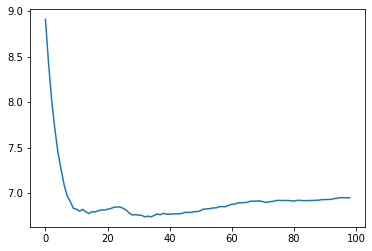

In [ ]:
x_axis=np.arange(len(GB_bias))
plt.plot(x_axis,GB_bias)

In [ ]:
np.argmin(GB_bias)

34

In [ ]:
AB_bias=[]
for n in np.arange(1,150):
  AB=AdaBoostRegressor(n_estimators=n,random_state=0)
  scores=cross_val_score(AB,X_new,Y,cv=3,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(scores))
  AB_bias.append(np.mean(rmse))


In [ ]:
LR=LinearRegression()

In [ ]:
ABLR_bias=[]
for n in np.arange(1,150):
  ABLR=AdaBoostRegressor(base_estimator=LR,n_estimators=n,random_state=0)
  scores=cross_val_score(ABLR,X_new,Y,cv=3,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(scores))
  ABLR_bias.append(np.mean(rmse))


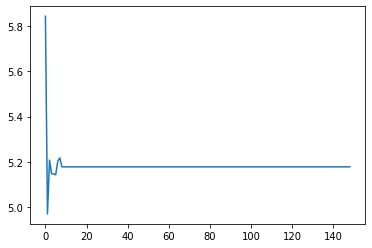

In [ ]:
x_axis=np.arange(len(ABLR_bias))
plt.plot(x_axis,ABLR_bias)

In [ ]:
np.argmin(ABLR_bias), ABLR_bias[1]

(1, 4.971462549668522)

In [ ]:
Bag_bias=[]
Bag_var=[]
for n in np.arange(1,100):
  Bag=BaggingRegressor(base_estimator=LR,n_estimators=n,random_state=0)
  scores=cross_val_score(Bag,X_new,Y,cv=3,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(scores))
  Bag_bias.append(np.mean(rmse))
  Bag_var.append(np.std(rmse,ddof=1))


In [ ]:
np.min(Bag_var),np.argmin(Bag_var),Bag_bias[65]

(1.1105623537387594, 65, 5.083412445820228)

In [ ]:
np.min(Bag_bias),np.argmin(Bag_bias),Bag_var[58]

(5.074089662178369, 58, 1.140983721505519)

In [ ]:
(5.08-5.07)/5.08

0.001968503937007832

In [ ]:
(1.14-1.11)/1.14

0.026315789473684043

In [ ]:
RF_bias=[]
RF_var=[]
for n in np.arange(1,100):
  RF=RandomForestRegressor(criterion='mse',n_estimators=n,random_state=0)
  scores=cross_val_score(RF,X_new,Y,cv=3,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(scores))
  RF_bias.append(np.mean(rmse))
  RF_var.append(np.std(rmse,ddof=1))


In [ ]:
np.argmin(RF_bias),np.min(RF_bias),RF_var[28]

(28, 6.382761196205711, 1.716628041424876)

In [ ]:
np.argmin(RF_var),np.min(RF_var), RF_bias[0]

(0, 0.5486360109794219, 7.8744161133274675)

In [ ]:
LR=LinearRegression()
LR_bag=BaggingRegressor(base_estimator=LR,n_estimators=59,random_state=0)
LR_AB=AdaBoostRegressor(base_estimator=LR,n_estimators=2,random_state=0)
DT_AB=AdaBoostRegressor(n_estimators=26,random_state=0)
LR_GB=GradientBoostingRegressor(n_estimators=35,random_state=0)
RF=RandomForestRegressor(criterion='mse',n_estimators=29,random_state=0)
stacked = VotingRegressor(estimators = [('Bagged_LR',LR_bag),('LR', LR), ('LR_Boost', LR_AB)])


In [ ]:
models = []
models.append(('LinearRegression', LR))
models.append(('BaggedLR',LR_bag))
models.append(('Adaboost',LR_AB))
models.append(('DT_boost',DT_AB))
models.append(('GBoost',LR_GB))
models.append(('RF',RF))
models.append(('Stacked',stacked))



LinearRegression: 5.218925 (0.873524)
BaggedLR: 5.200945 (0.892034)
Adaboost: 5.746590 (0.559691)
DT_boost: 6.453378 (1.735080)
GBoost: 5.962980 (1.359669)
RF: 5.932495 (1.834143)
Stacked: 5.297472 (0.769845)


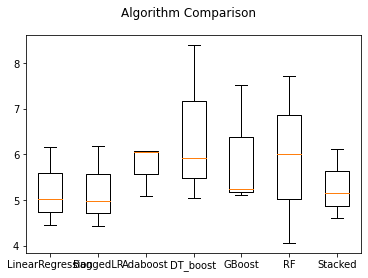

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_new, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
(5.297472-5.218925)/5.297472

0.014827261002984133

In [ ]:
(0.873524-0.769845)/0.873524

0.11869049963137815

In [ ]:
#Final Inference
#5.746590 (0.559691)
#[$5187-$6305]

#3 datasets 
#glu  => 8.56, 2.45
#explore more models, =>4.23,.96


In [ ]:
(5.746590-5.297)/5.746590

0.07823596254474402

In [ ]:
(0.769845-0.5596)/0.7698

0.2731163938685373

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
knn=KNeighborsRegressor()
knn_params={'n_neighbors':np.arange(1,20),'weights':['uniform','distance']}

In [ ]:
GS=GridSearchCV(knn,knn_params,cv=3,scoring='neg_mean_squared_error')

In [ ]:
X_scaled=StandardScaler().fit_transform(X_new)

In [ ]:
GS.fit(X_scaled,Y)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
GS.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [ ]:
rmse_ve=[]
rmse_be=[]
for n in np.arange(1,50):
  KNN=KNeighborsRegressor(weights='distance',n_neighbors=n)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  mse=model_selection.cross_val_score(KNN,X_scaled,Y,cv=kfold,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(mse))
  rmse_ve.append(np.std(rmse,ddof=1))
  rmse_be.append(np.mean(rmse))

In [ ]:
np.min(rmse_ve),np.argmin(rmse_ve),rmse_be[0]

(0.5950664644901348, 0, 6.532454581545693)

In [ ]:
np.min(rmse_be),np.argmin(rmse_be),rmse_ve[1]

(6.0815675666956315, 1, 1.6391681005372636)

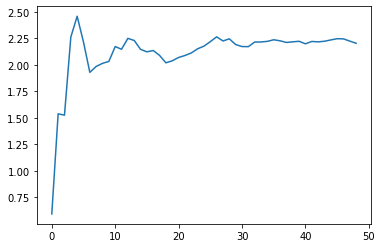

In [ ]:
x_axis=np.arange(len(rmse_ve))
plt.plot(x_axis,rmse_ve)

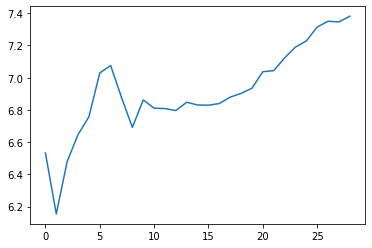

In [ ]:
x_axis=np.arange(len(rmse_be))
plt.plot(x_axis,rmse_be)

In [ ]:
np.argmin(rmse_be) #corresponding n_neigh=2, with be=6.15,ve=1.53
#choice-1: [$4620 to $7680]
#choice-2: [5940 to $7120]
#We go with choice-2,'coz we get 64.5% reduction in VE compared to m1 by
#trading off just 6% in the BE

1

In [ ]:
#RF Vs #KNN


In [ ]:
(1.53-0.59)/1.53

0.6143790849673203

In [ ]:
(6.53-6.15)/6.53

0.0581929555895865

In [ ]:
rmse_ve[0]   #with n_neigh=1, ve=0.59 wi=6.53th be

0.5950664644901348

In [ ]:
rmse_be[0]

6.532454581545693

In [ ]:
KNN=KNeighborsRegressor(n_neighbors=1)
RF=RandomForestRegressor(criterion='mse',n_estimators=10)

In [ ]:
models = []
models.append(('RandomForest', RF))
models.append(('KNN',KNN))

RandomForest: 6.459632 (1.325236)
KNN: 6.125137 (1.728460)


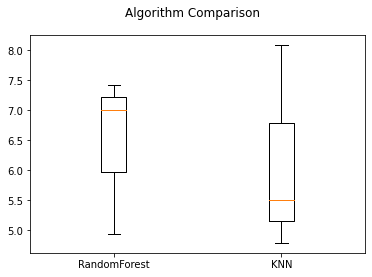

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_scaled, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)